# M12-L1 Problem 1

This problem is intended to demonstrate PCA on a small 2D dataset. This will emphasize how PCs are computed and what they mean.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2.5, 2.4],[0.5, 0.7],[2.2, 2.9],[1.9, 2.2],[3.1, 3. ],
              [2.3, 2.7],[2., 1.6],[1., 1.1],[1.5, 1.6],[1.1, 0.9]])


## Computing the Principal Components

First, compute the principal components of the dataset by following these steps:
1. Compute `M` ($1\times 2$), the mean of each dimension in `X`
2. Compute `S` ($2\times 2$), the covariance matrix of `X` (see `np.cov`)
3. Report `w`, the 2 eigenvalues of `S` (see `np.linalg.eig`)
4. Get `e1` and `e2`, the eigenvectors corresponding to the elements of `w`

The principal components in this problem are then `e1` and `e2`.




In [5]:
print('X:\n', X)

M = np.mean(X, axis=0)
print('\nMean of each dimension:\n', M)

S = np.cov(X, rowvar=False)
print('\nCovariance Matrix:\n', S)

w, v = np.linalg.eig(S)
w = np.real(w)
print('\nEigenvalues of covariance matrix:\n',w)

indices = np.argsort(-w)
v = v[:,indices]
e1 =  v[:,0]
e2 =  v[:,1]
print('\nPrincipal Components:')
print('e1:',e1)
print('e2:',e2)

X:
 [[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]

Mean of each dimension:
 [1.81 1.91]

Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]

Eigenvalues of covariance matrix:
 [0.0490834  1.28402771]

Principal Components:
e1: [-0.6778734  -0.73517866]
e2: [-0.73517866  0.6778734 ]


## Plotting data with principal components

Complete the code below to plot the original data with principal components represented as unit vector arrows.

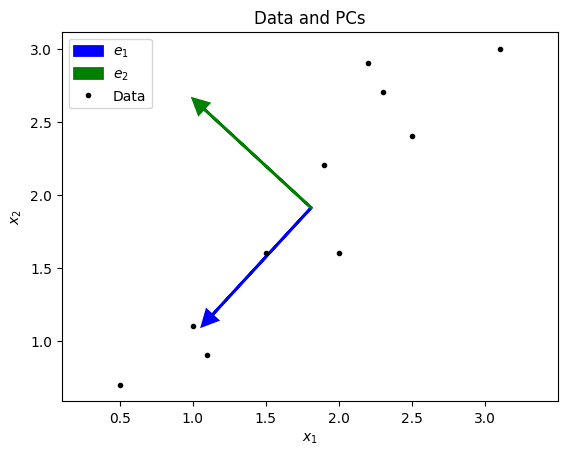

In [6]:
plt.figure()
plt.title("Data and PCs")

e1, e2 = e1.flatten(), e2.flatten()
plt.arrow(M[0],M[1],e1[0],e1[1], color="blue", linewidth=2, head_width=0.1, head_length=0.1, label="$e_1$")
plt.arrow(M[0],M[1],e2[0],e2[1], color="green", linewidth=2, head_width=0.1, head_length=0.1, label="$e_2$")
plt.plot(X[:,0],X[:,1],'.',color="black", label="Data")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.axis("equal")
plt.show()

## Plotting transformed data

Now, transform the data with the formula $a_i = (x-\mu)\bullet e_i$.

Print the transformed data matrix columns `a1` and `a2`.

Then plot the transformed data on $e_1-e_2$ axes.

a_1 =  [-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]
a_2 =  [-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
 -0.3498247   0.04641726  0.01776463 -0.16267529]


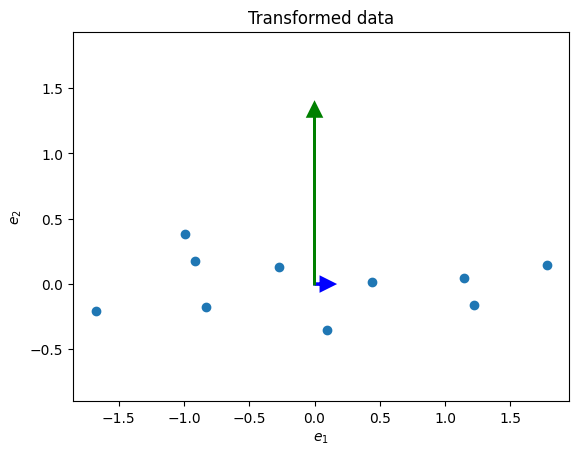

In [7]:
a1, a2 = ((X - M) @ np.array([e1.T, e2.T])).T

print("a_1 = ",a1)
print("a_2 = ",a2)

plt.figure()
plt.title("Transformed data")

e1, e2 = e1.flatten(), e2.flatten()
plt.scatter(a1, a2)
plt.arrow(0,0,w[0],0, color="blue", linewidth=2, head_width=0.1, head_length=0.1, label="$e_1$")
plt.arrow(0,0,0,w[1], color="green", linewidth=2, head_width=0.1, head_length=0.1, label="$e_2$")

plt.xlabel("$e_1$")
plt.ylabel("$e_2$")
plt.axis("equal")
plt.show()